In [ ]:


# %matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import os

dataset = xr.open_dataset(r"d:\Data\5Q4C0510_DR1_scalinQ\20240611_0913_q4_xy_T1.nc")
print(dataset)

time = (dataset.coords["time"].values)/1000

from qcat.visualization.qubit_relaxation import plot_qubit_relaxation
from qcat.qubit.relaxation import qubit_relaxation_fitting

for ro_name, data in dataset.data_vars.items():
    print(ro_name)
    fit_result = qubit_relaxation_fitting(time, data.values[0])
    print(fit_result.params)
    fig, ax = plt.subplots()
    plot_qubit_relaxation(time, data[0], ax, fit_result)

T1 Histogram

<xarray.Dataset>
Dimensions:     (mixer: 2, repetition: 100, time: 100)
Coordinates:
  * mixer       (mixer) <U1 'I' 'Q'
  * time        (time) int32 16 616 1216 1816 2416 ... 57616 58216 58816 59416
  * repetition  (repetition) int32 0 1 2 3 4 5 6 7 8 ... 92 93 94 95 96 97 98 99
Data variables:
    q0_ro       (mixer, repetition, time) float64 ...
    q1_ro       (mixer, repetition, time) float64 ...
    q2_ro       (mixer, repetition, time) float64 ...
    q3_ro       (mixer, repetition, time) float64 ...
    q4_ro       (mixer, repetition, time) float64 ...
[24.149250145198096, 22.090223624093728, 23.826199101119467, 20.185804149854295, 19.58991392157032, 25.101709290400876, 24.01981896145054, 23.01798995924761, 24.54624114257276, 23.780604070604348, 23.235885174417728, 24.85734686990927, 24.983047602925872, 22.979448797115886, 23.088567344916235, 24.83563885146754, 24.538897566122586, 30.370082612067232, 27.114139043150626, 22.309258491593493, 25.561000562113534, 23.616634583322394

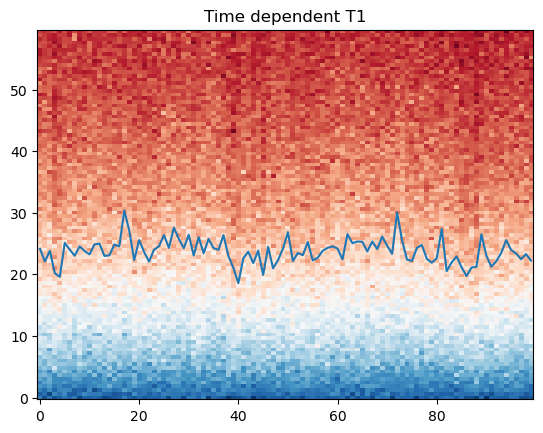

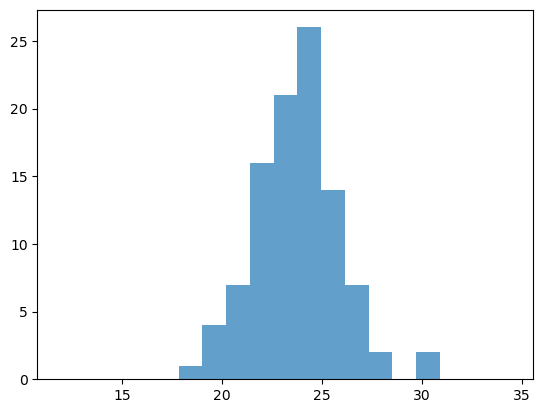

In [1]:
# %matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import os

dataset = xr.open_dataset(r"d:\Data\5Q4C0510_DR1_scalinQ\20240614_1608_q4_xy_T1.nc")
print(dataset)

time = (dataset.coords["time"].values)/1000

from qcat.visualization.qubit_relaxation import plot_time_dep_qubit_relaxation_2Dmap, plot_qubit_relaxation_hist
from qcat.qubit.relaxation import qubit_relaxation_fitting


rep = dataset.coords["repetition"].values
dataset.data_vars.items()
single_name = "q4_ro"
for ro_name, data in [(single_name, dataset["q4_ro"])]:
    acc_T1 = []
    for i in range(rep.shape[-1]):
        fit_result = qubit_relaxation_fitting(time, data.values[0][i])
        acc_T1.append(fit_result.params["tau"].value)
    fig, ax = plt.subplots()
    plot_time_dep_qubit_relaxation_2Dmap( rep, time, data.values[0], ax, fit_result=acc_T1)
    print(acc_T1)
    fig1, ax1 = plt.subplots()

    plot_qubit_relaxation_hist( np.array(acc_T1), ax1 )

